In [ ]:
# PROJECT: Customer Segmentation Using Unsupervised Learning

# 📌 INTRODUCTION
This project clusters mall customers based on their spending behavior using unsupervised learning.  
The goal is to identify customer segments that can help tailor marketing strategies effectively.

The dataset contains information like age, annual income, and spending score, which will be used to group similar customers.

# 🎯 Objectives:
- Load and preprocess the dataset  
- Conduct Exploratory Data Analysis (EDA)  
- Apply K-Means Clustering  
- Use PCA or t-SNE to visualize clusters  
- Suggest marketing strategies for each cluster

In [15]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Basic Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Load the dataset
df = pd.read_excel('Mall_Customers.xlsx')

# Preview the first few rows
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [18]:
# Check for missing values
df.info()

# Rename columns for consistency
df.columns = ['CustomerID', 'Gender', 'Age', 'Education', 'Marital_Status', 'Annual_Income_k$', 'Spending_Score']

# Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        200 non-null    int64 
 1   Gender            200 non-null    object
 2   Age               200 non-null    int64 
 3   Education         200 non-null    object
 4   Marital_Status    200 non-null    object
 5   Annual_Income_k$  200 non-null    int64 
 6   Spending_Score    200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


       CustomerID  Gender         Age  Annual_Income_k$  Spending_Score  \
count  200.000000     0.0  200.000000        200.000000      200.000000   
mean   100.500000     NaN   38.850000         60.560000       50.200000   
std     57.879185     NaN   13.969007         26.264721       25.823522   
min      1.000000     NaN   18.000000         15.000000        1.000000   
25%     50.750000     NaN   28.750000         41.500000       34.750000   
50%    100.500000     NaN   36.000000         61.500000       50.000000   
75%    150.250000     NaN   49.000000         78.000000       73.000000   
max    200.000000     NaN   70.000000        137.000000       99.000000   

          Cluster  
count  200.000000  
mean     1.755000  
std      1.468249  
min      0.000000  
25%      0.000000  
50%      2.000000  
75%      3.000000  
max      4.000000  


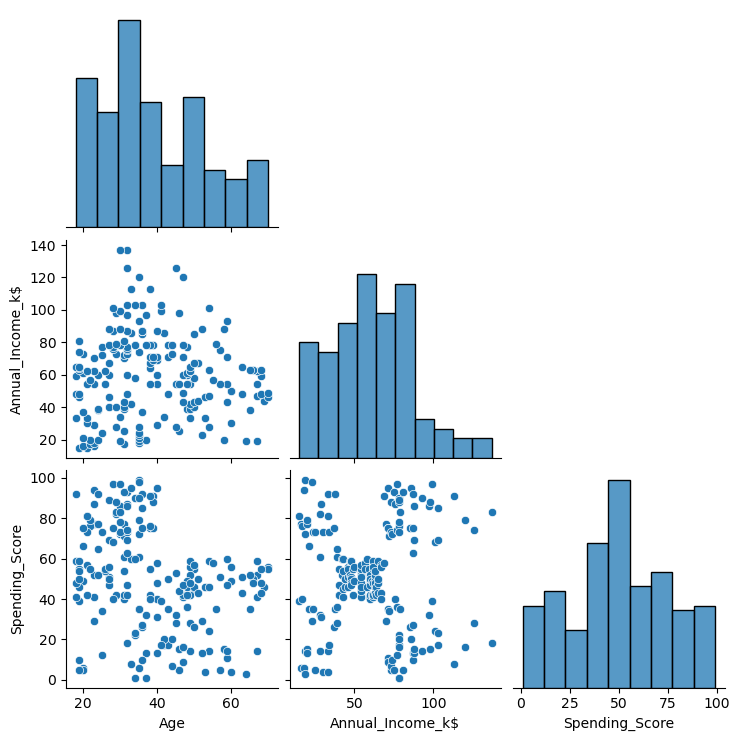

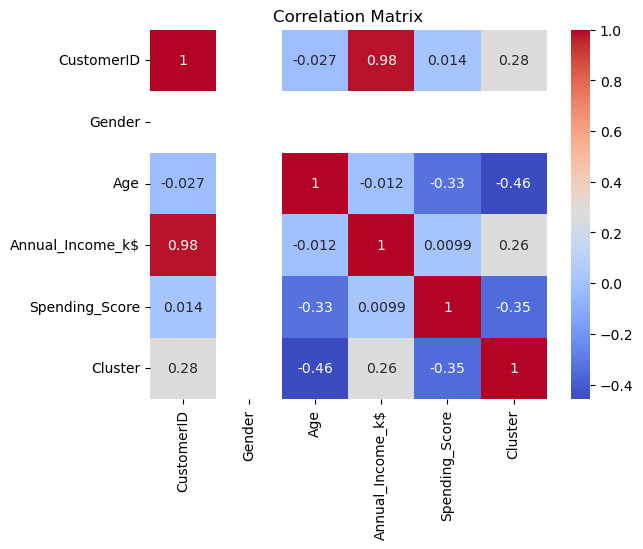

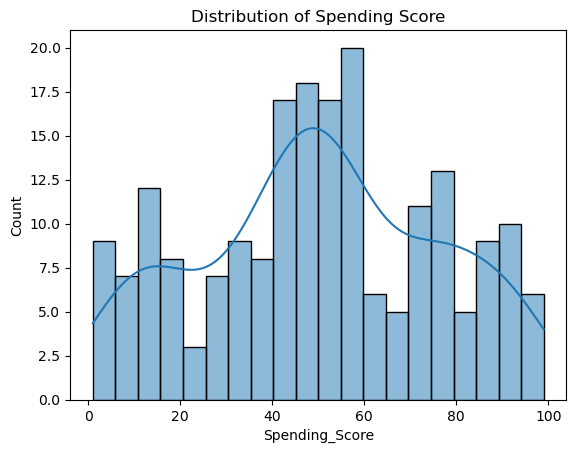

In [14]:
# Summary statistics
print(df.describe())

# Pairplot
sns.pairplot(df[['Age', 'Annual_Income_k$', 'Spending_Score']], corner=True)
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of Spending Score
sns.histplot(df['Spending_Score'], kde=True, bins=20)
plt.title('Distribution of Spending Score')
plt.show()

In [65]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

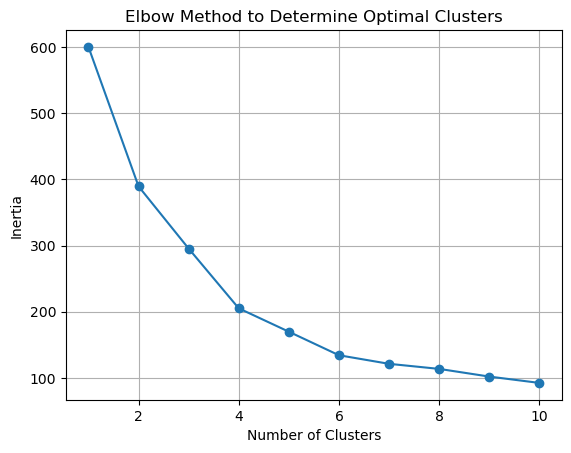

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Features for clustering
features = df[['Age', 'Annual_Income_k$', 'Spending_Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Determine optimal number of clusters using Elbow Method
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.plot(range_k, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.grid(True)
plt.show()

# Let's use k = 5 (based on elbow)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

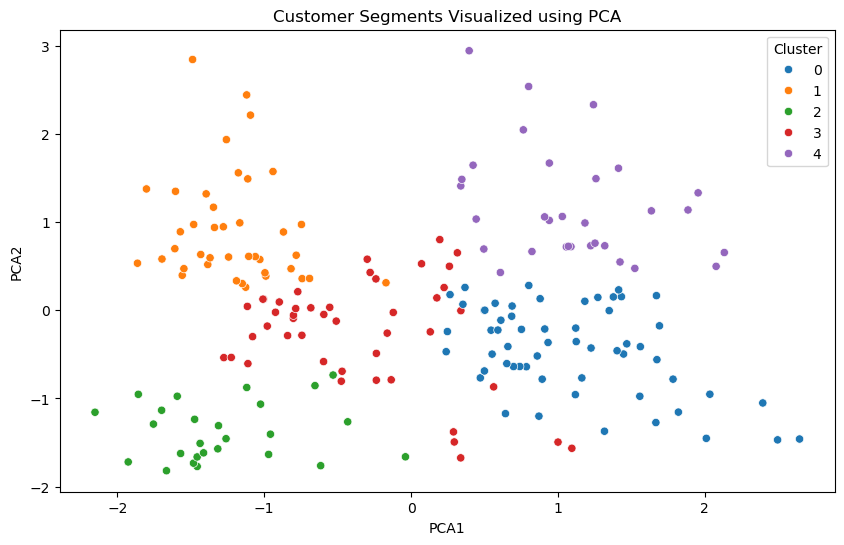

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='tab10')
plt.title('Customer Segments Visualized using PCA')
plt.show()

In [ ]:
# ✅ FINAL CONCLUSION

Cluster Results (K-means on Age, Annual Income, Spending Score):  
- Cluster 0 – Luxury Shoppers: Young to middle-aged, high income, high spending score.  
- Cluster 1 – Budget-Conscious Seniors: Older, low income, low spending score.  
- Cluster 2 – Value Hunters: Young, low-to-mid income, high spending score.  
- Cluster 3 – Mid-Income Steady Buyers: Middle-aged, medium income, medium spending score.  
- Cluster 4 – High-Income Low Spenders: High income, low spending score.

Insights from Cluster Analysis:
Analysis of customer segmentation showed that the most influential factors in grouping were:  
- Annual income — clear separation between high and low earners.  
- Spending score — strongest driver for identifying high-value vs budget customers.  
- Age — revealed patterns in purchase behavior (younger customers spend more impulsively).  

# 🔍 Strategic Suggestions:

1. *Luxury Shoppers (Cluster 0) — Maintain loyalty via exclusive perks, early product access, and personalized luxury recommendations.  

2. *Budget-Conscious Seniors (Cluster 1)* — Promote affordable essentials, avoid aggressive upselling.  

3. *Value Hunters (Cluster 2)* — Use flash sales, discount coupons, and bundle promotions to drive engagement.  

4. *Mid-Income Steady Buyers (Cluster 3)* — Implement loyalty programs and seasonal offers to increase spending frequency.  

5. *High-Income Low Spenders (Cluster 4)* — Target with aspirational campaigns and premium upselling strategies.  

# Summary:  
K-means clustering reveals distinct customer segments that can be leveraged for precision marketing.  
By aligning marketing strategies to each group’s profile, businesses can increase revenue, improve customer satisfaction, and reduce wasted campaign costs.